In [1]:
import numpy as np
import pylab as plt
import scipy as sc
import yaml as yaml
import pickle as pickle
import networkx as nx
import os as os

from NAQ_graphs import NAQ
from graph_generator import generate_graph

%matplotlib notebook

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
os.chdir(graph_tpe)

<IPython.core.display.Javascript object>


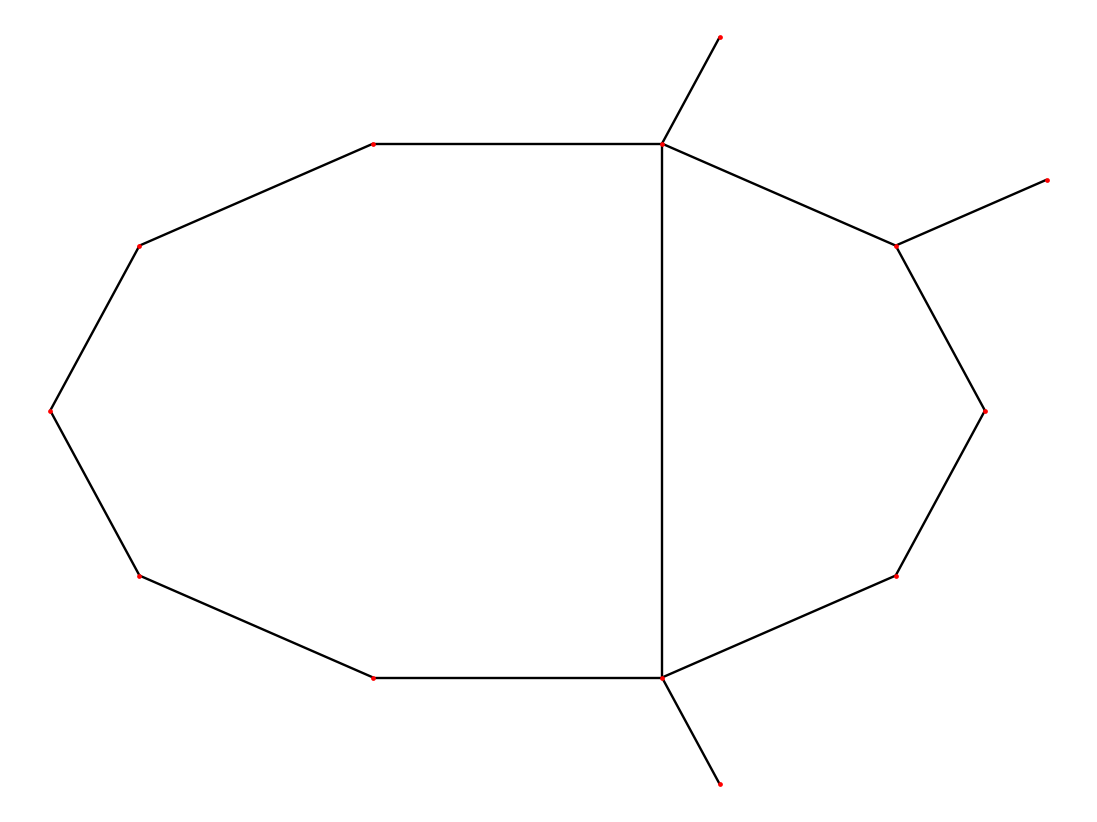

In [2]:
%matplotlib notebook

plt.figure()
nx.draw(G,pos=pos,node_size=1)

In [3]:
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)
naq_u1.n_processes_scan = 4 #number of CPU to use

naq_u1.set_chi((1.+1.j)*naq_u1.chi0)

naq_u1.update_laplacian()

In [4]:
Ks = np.linspace(7, 14, 10)
Alphas = np.linspace(0, .6, 5)

modes = naq_u1.find_modes(Ks, Alphas, params, th = 1e-3) #find many modes (start many searches in a grid)
pickle.dump(modes, open('modes.pkl', 'wb'))

16 modes out of 49 attempts


In [5]:
Ks = np.linspace(7,14, 100)
Alphas = np.linspace(0,.6, 50)

s = naq_u1.scan_k(Ks,Alphas) #compute a fine scan of the parameter space
pickle.dump([Ks, Alphas, s], open('scan.pkl', 'wb'))

<IPython.core.display.Javascript object>


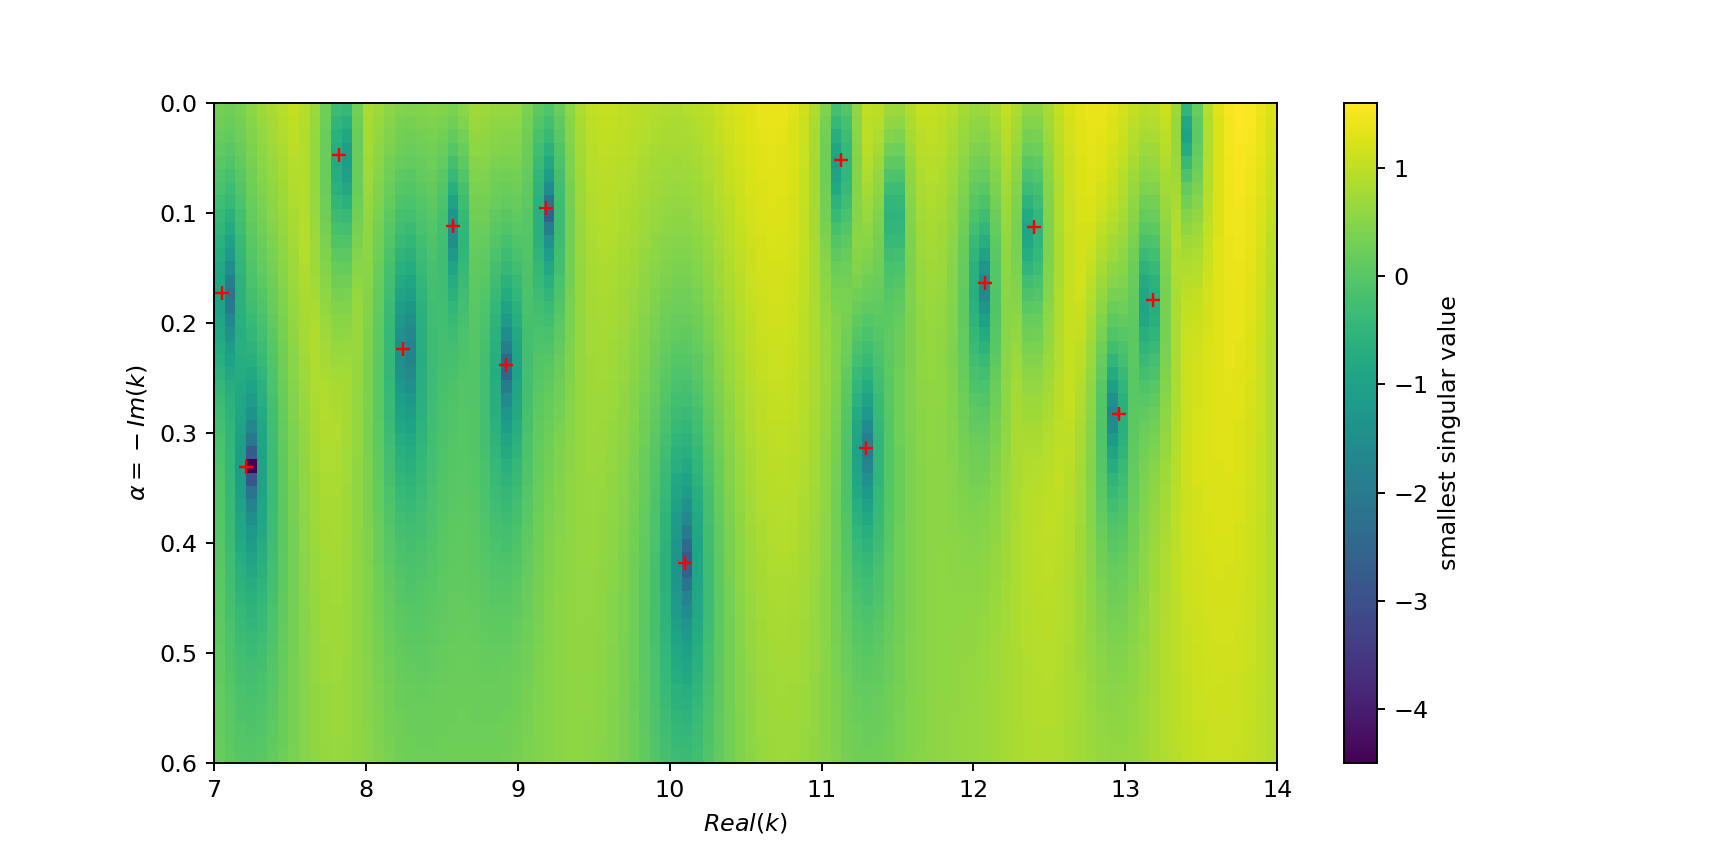

In [6]:
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.savefig('scan_modes.svg')

k= (7.820309068935882-0.04785194463972004j)


<IPython.core.display.Javascript object>


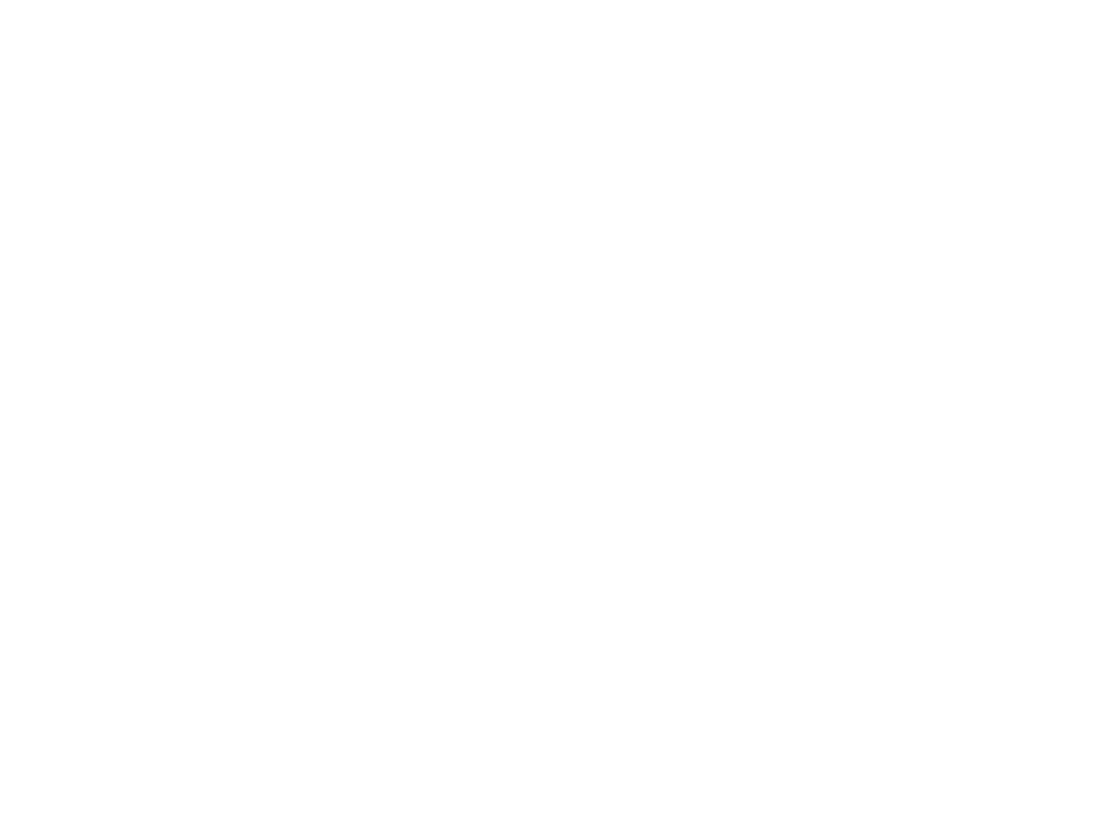

k= (11.126443071115741-0.05175789291786134j)


<IPython.core.display.Javascript object>


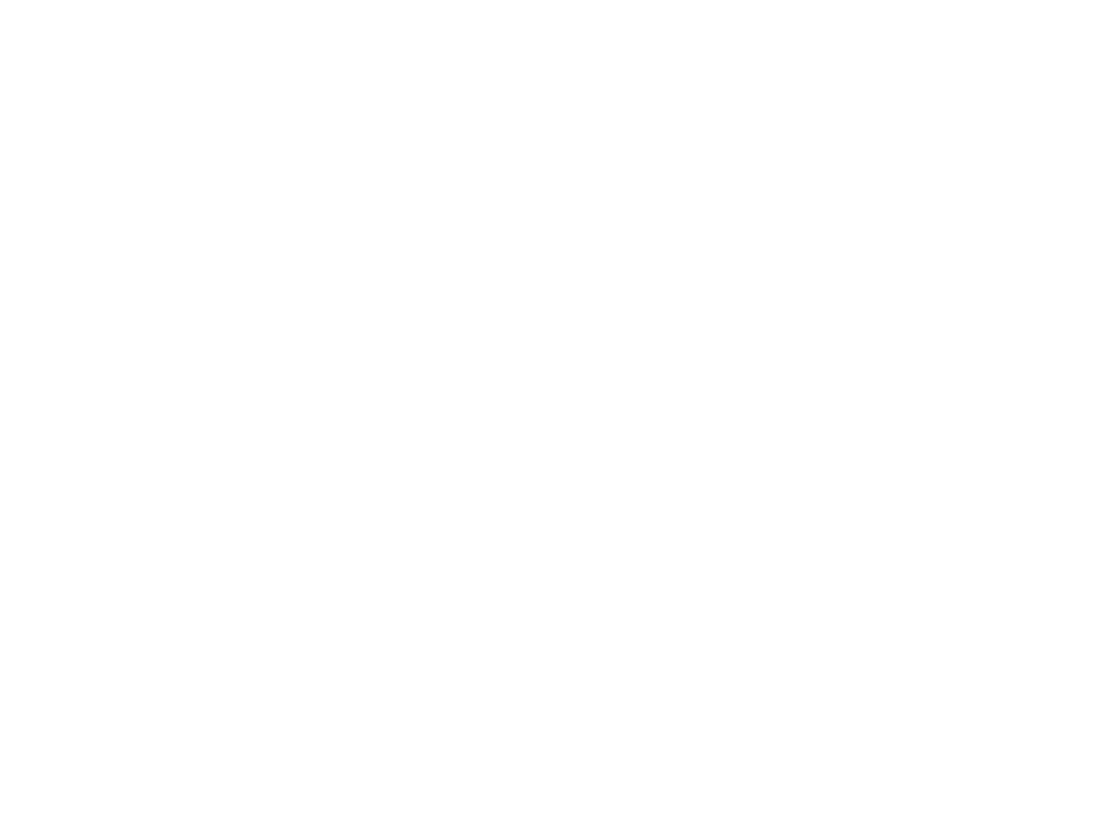

k= (9.183838572079242-0.09591655747788934j)


<IPython.core.display.Javascript object>


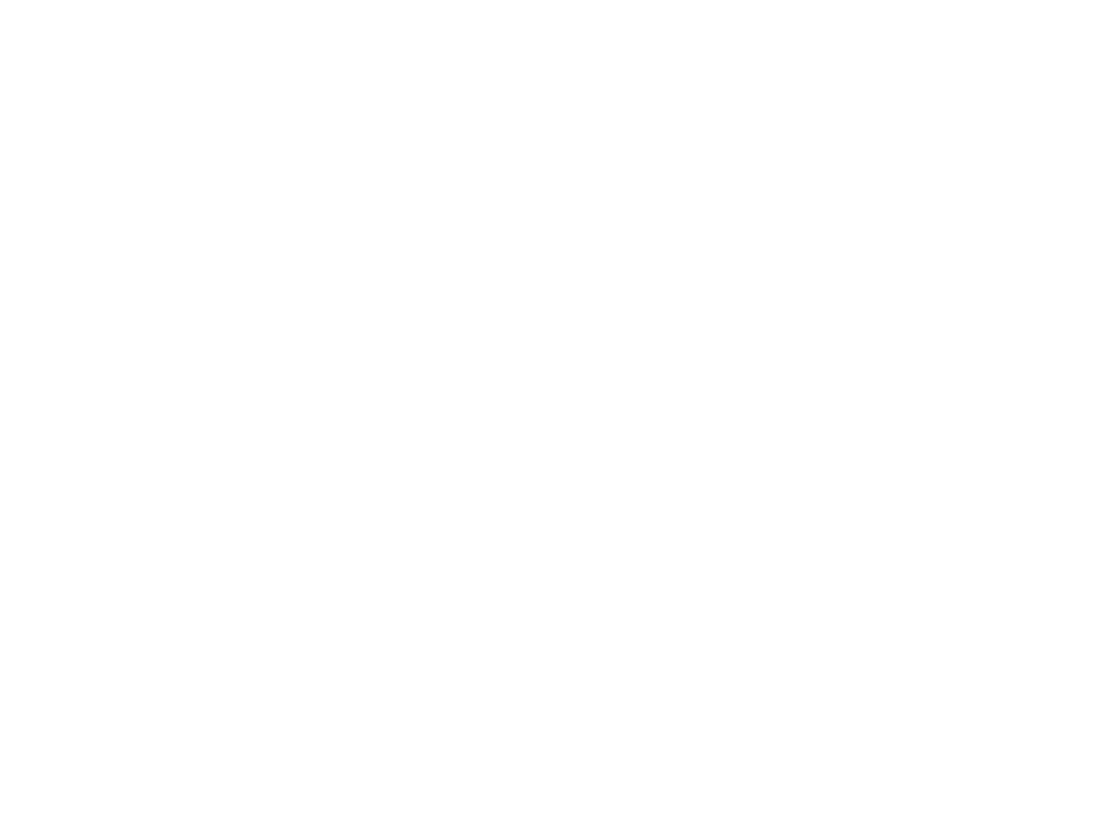

k= (8.574119605032845-0.11220974642987278j)


<IPython.core.display.Javascript object>


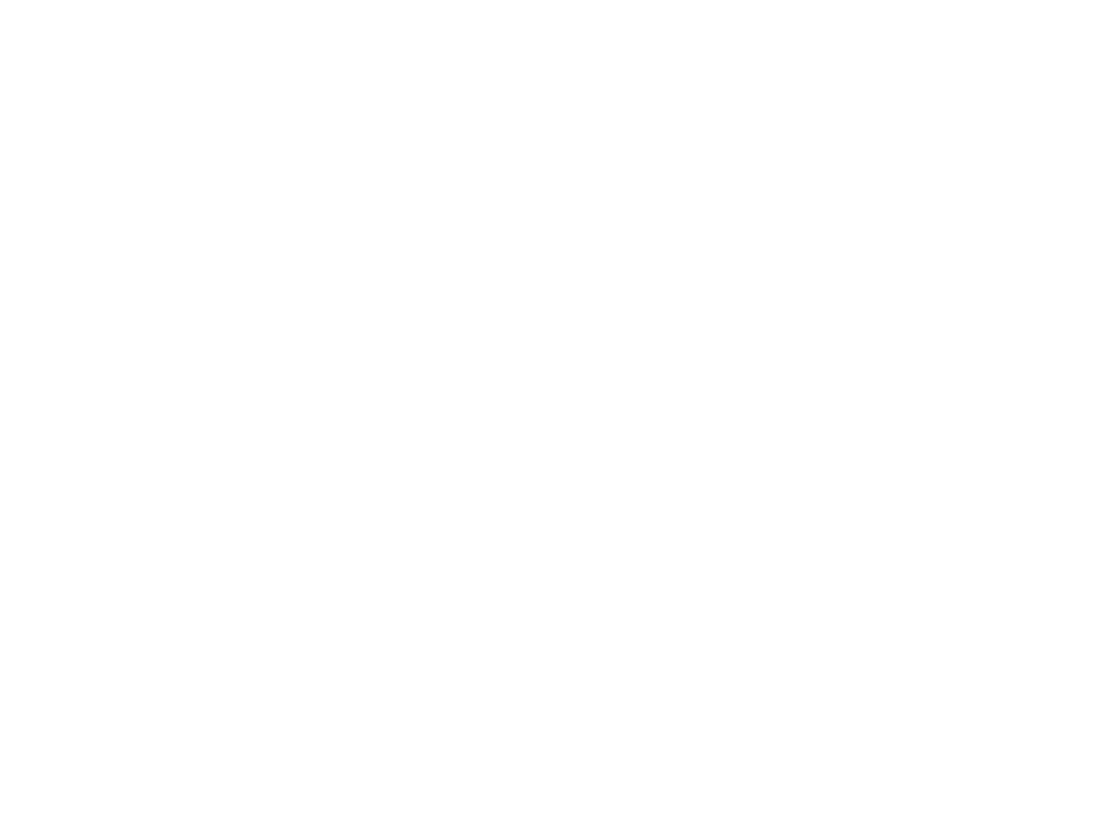

k= (12.40141728340402-0.1132199613073244j)


<IPython.core.display.Javascript object>


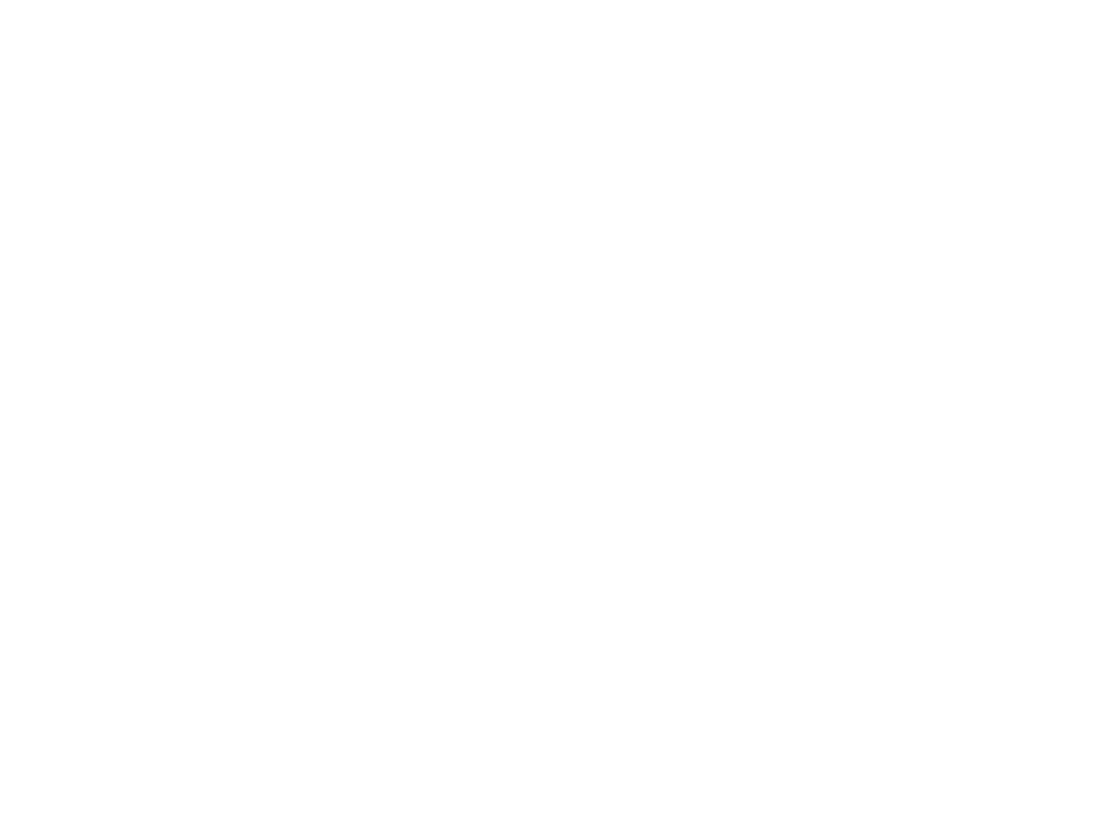

k= (14.237822373125205-0.15356016037867581j)


<IPython.core.display.Javascript object>


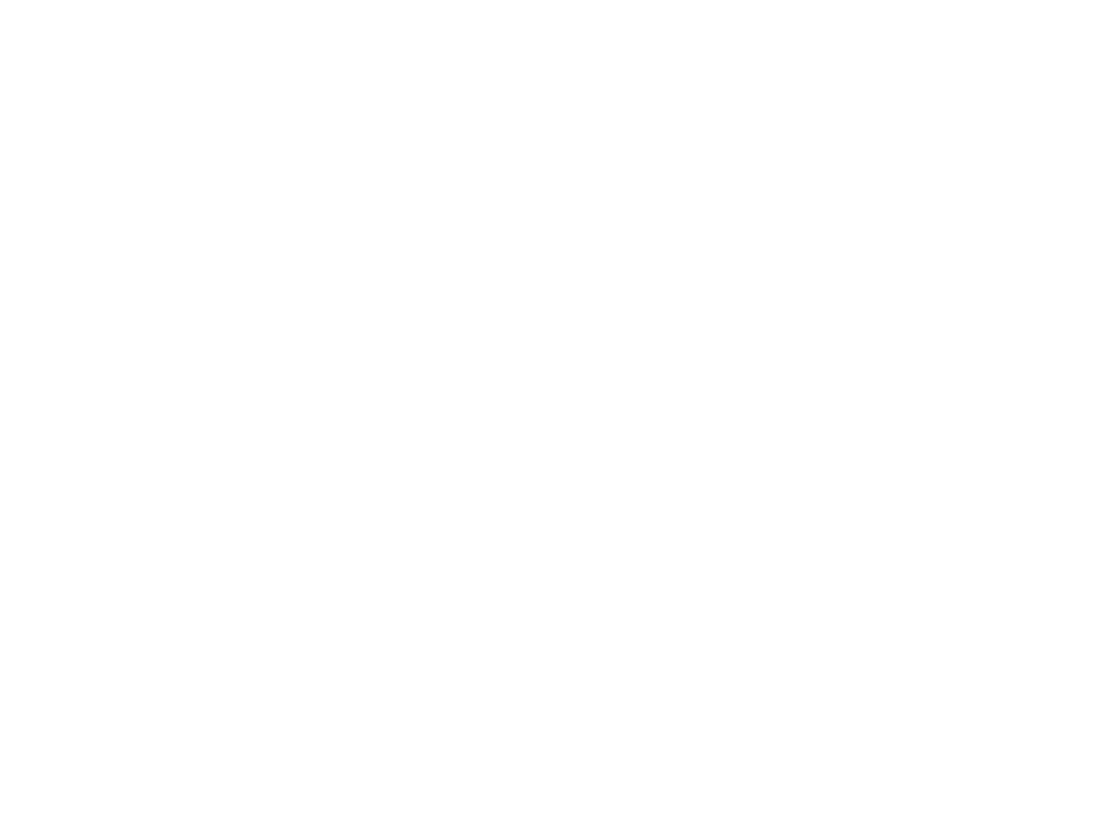

k= (12.072974673683389-0.16425113676295142j)


<IPython.core.display.Javascript object>


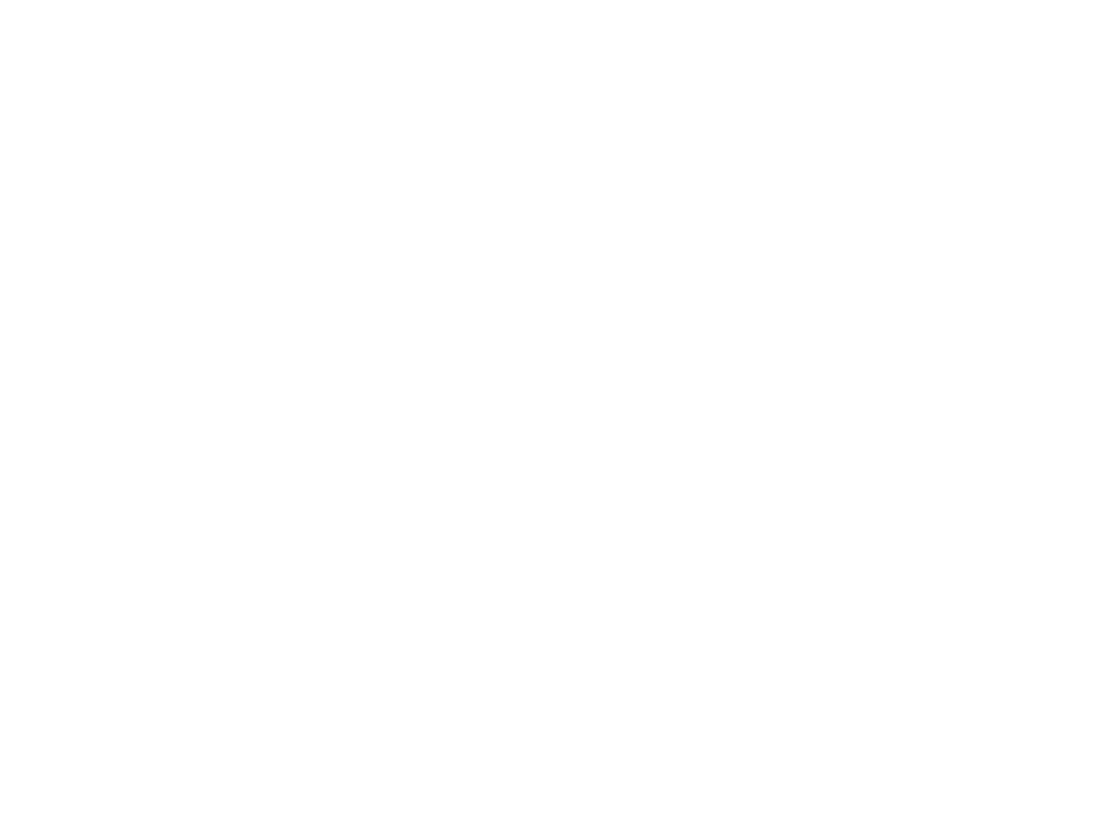

k= (7.0535977140957735-0.17307280690249827j)


<IPython.core.display.Javascript object>


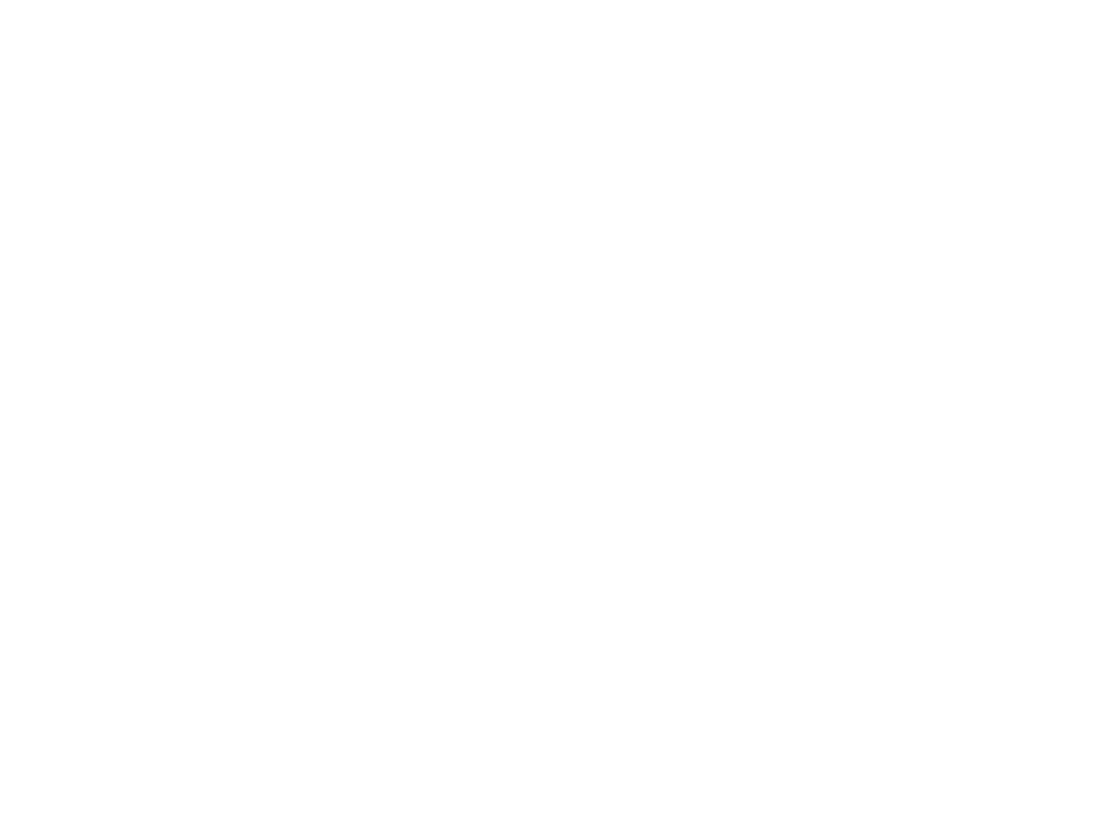

k= (13.182963113083956-0.17924430374661712j)


<IPython.core.display.Javascript object>


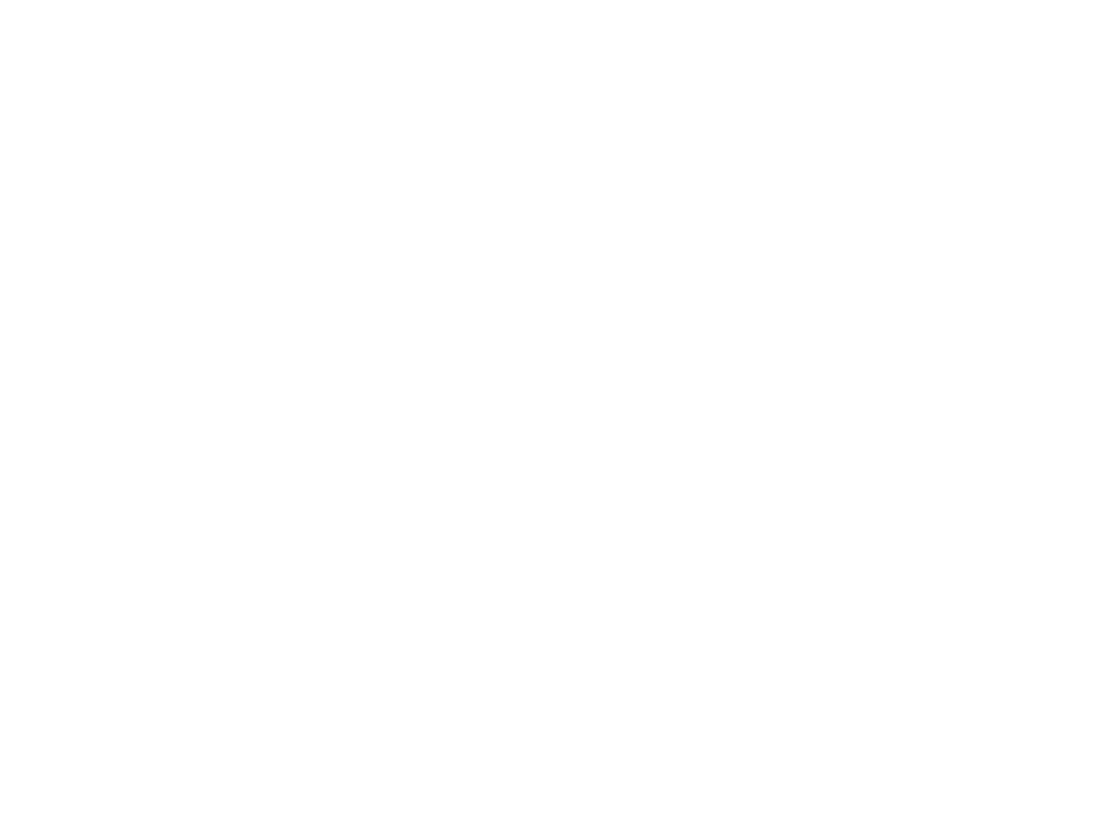

k= (8.242530026089094-0.22359041133458468j)


<IPython.core.display.Javascript object>


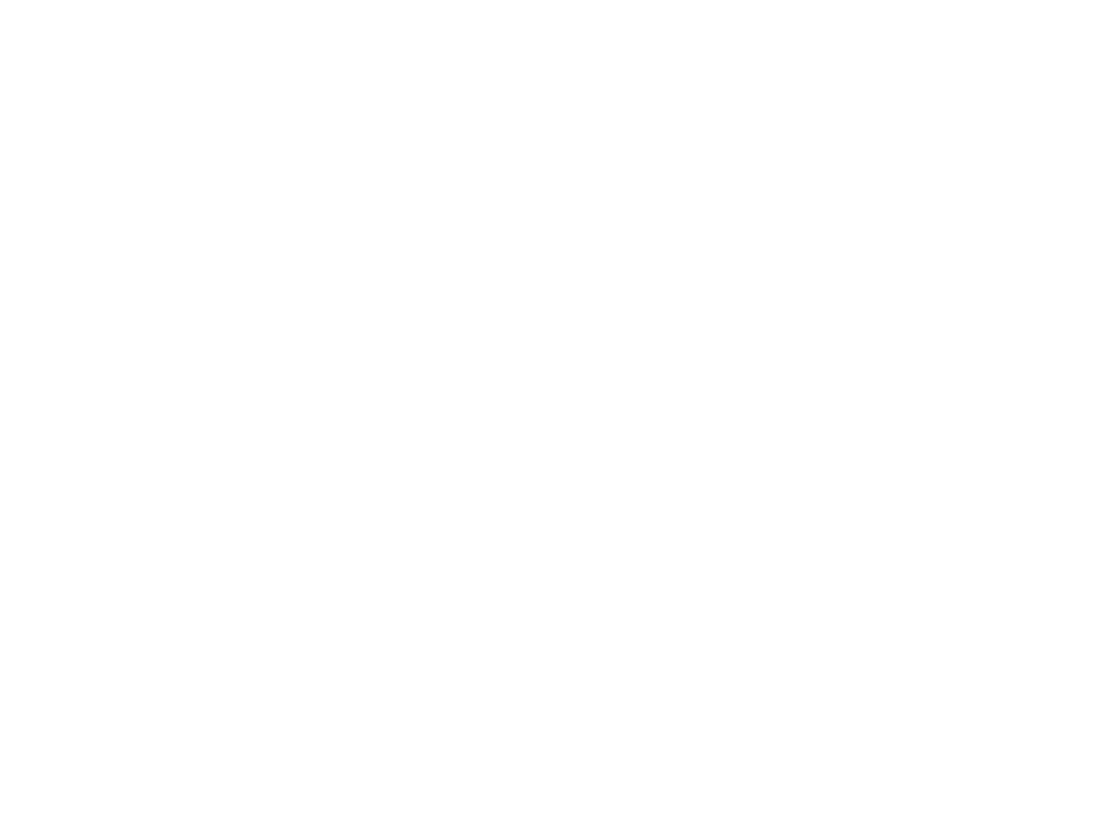

k= (8.921284342655046-0.23864650580881203j)


<IPython.core.display.Javascript object>


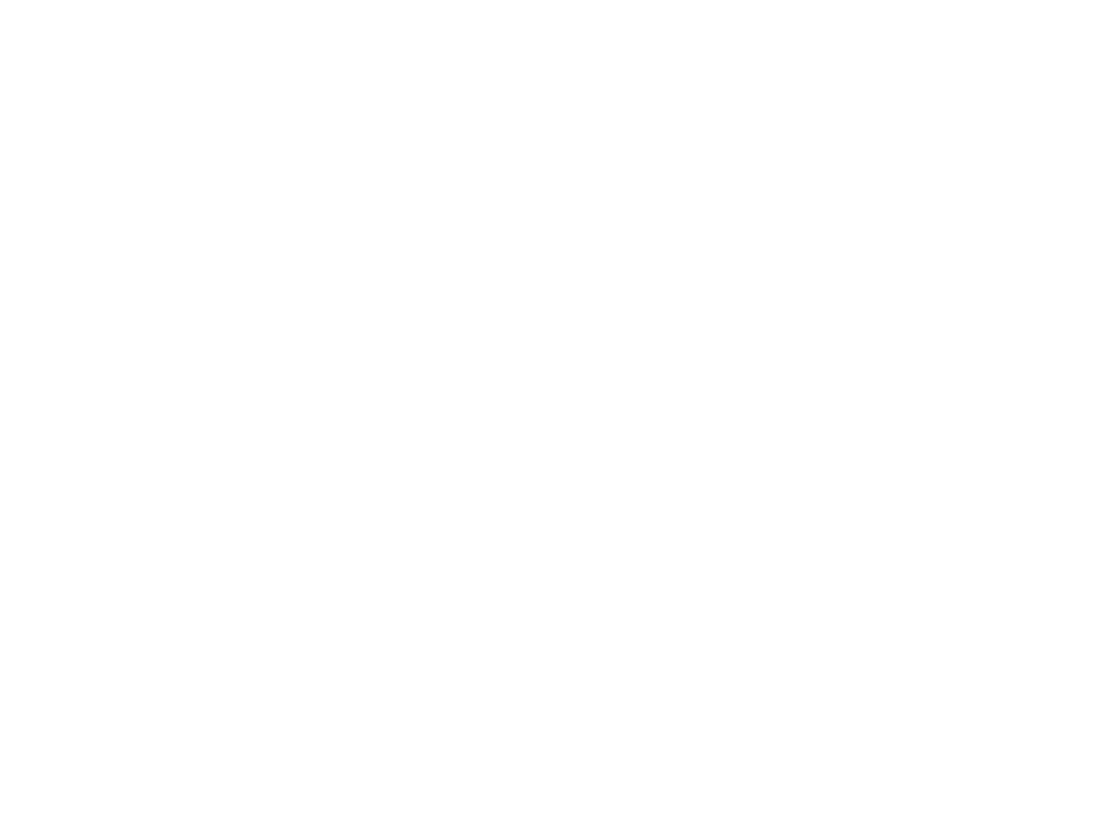

k= (12.956868543500343-0.28296656284722366j)


<IPython.core.display.Javascript object>


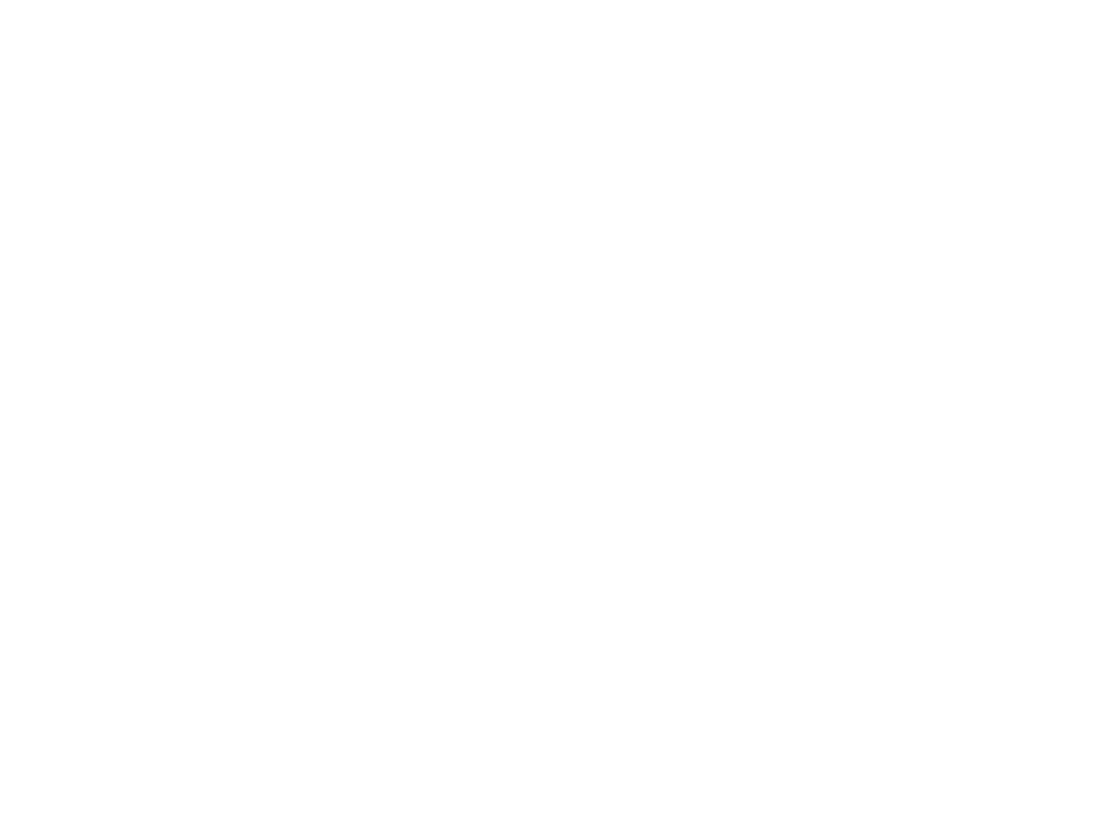

k= (11.293438320757167-0.31425752574814214j)


<IPython.core.display.Javascript object>


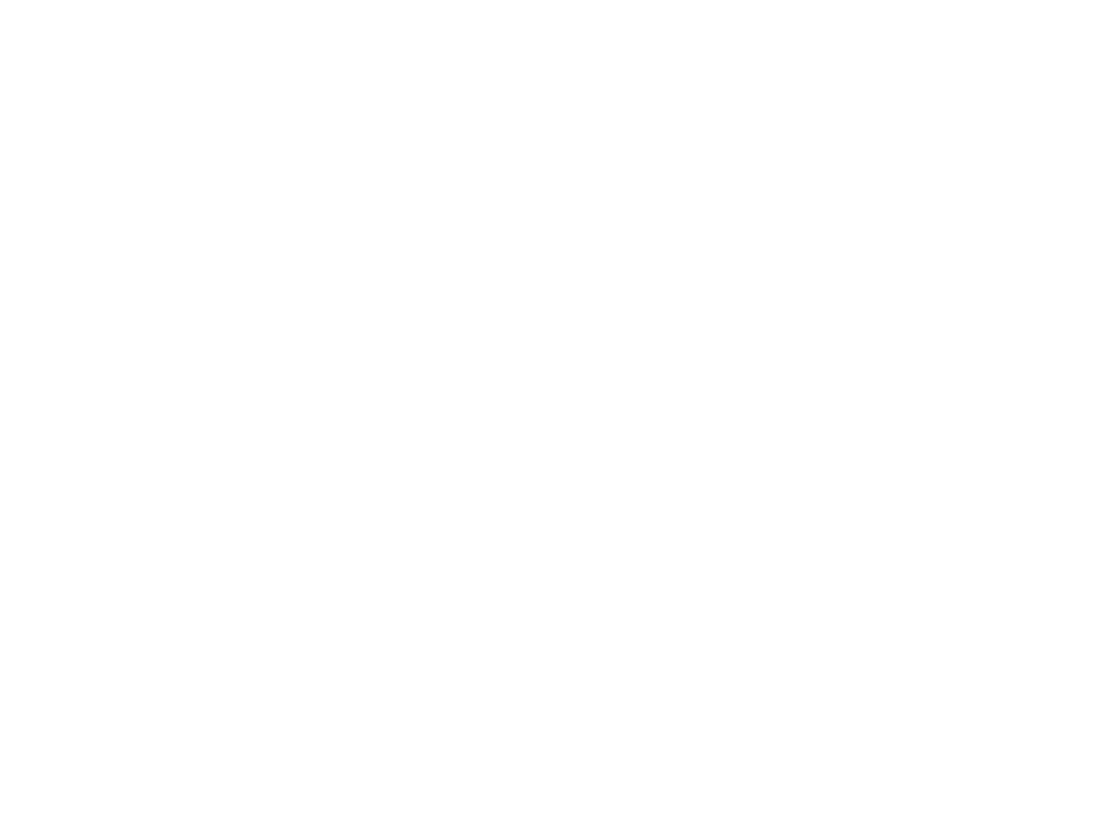

k= (14.374185003252116-0.31460278840434897j)


<IPython.core.display.Javascript object>


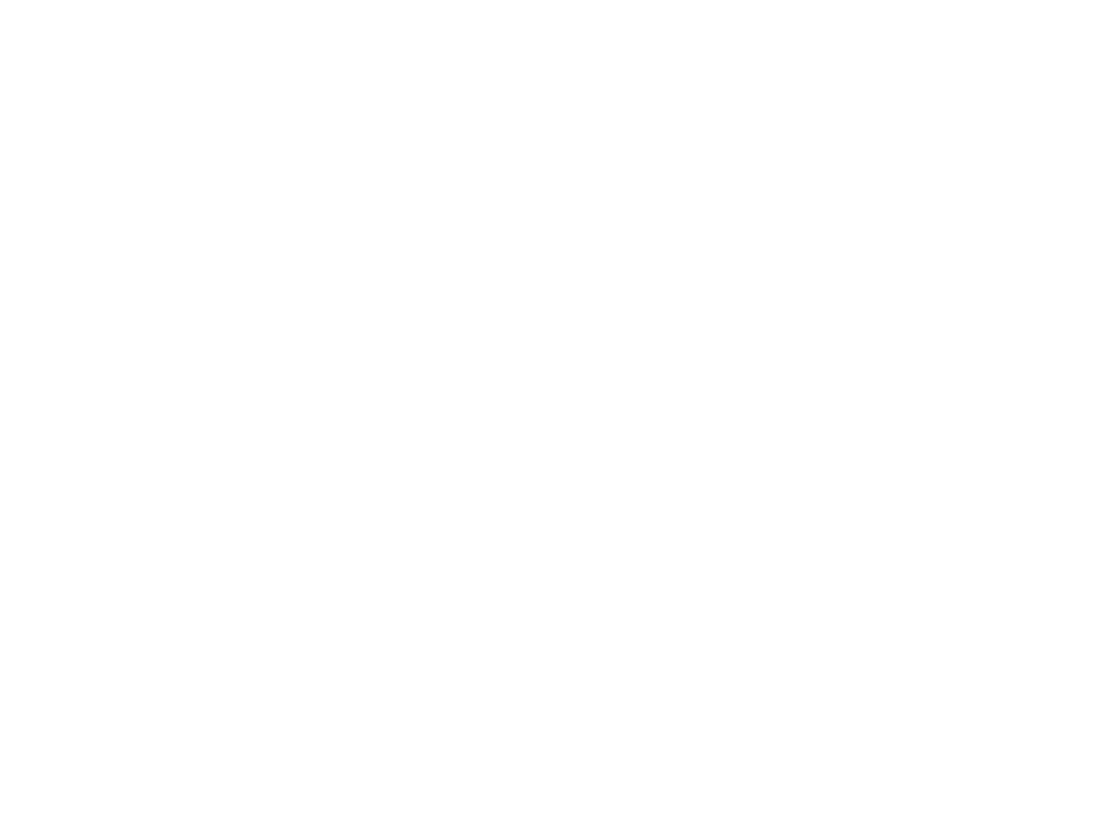

k= (7.21013604303624-0.33159263478956563j)


<IPython.core.display.Javascript object>


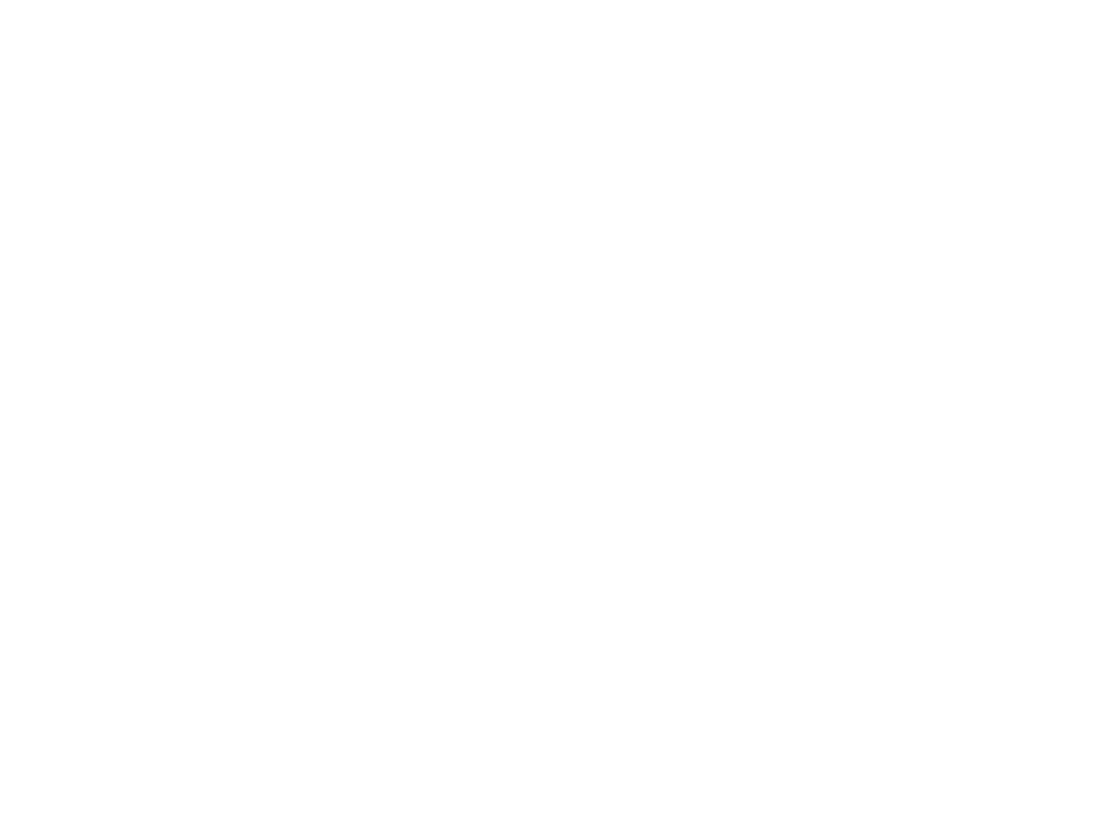

k= (10.097901612122351-0.41830126491512515j)


<IPython.core.display.Javascript object>


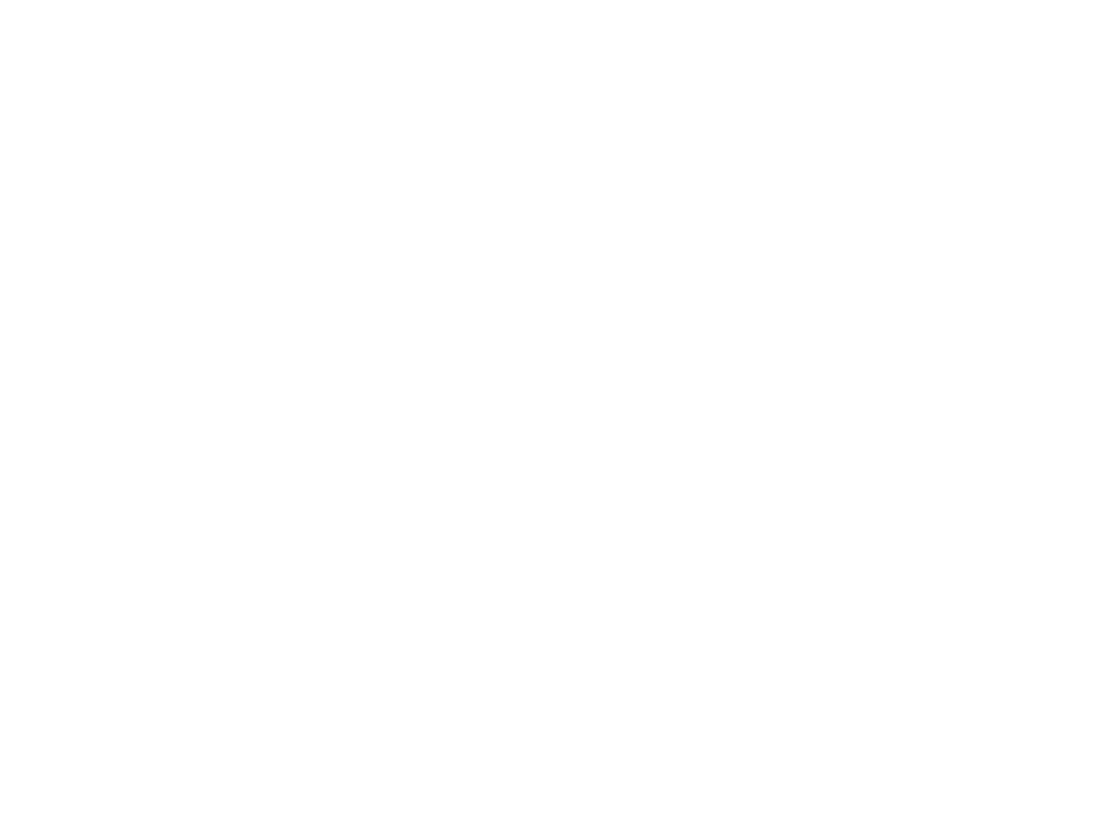

In [7]:
if not os.path.isdir('modes'):
    os.mkdir('modes')

for m in range(len(modes)):
    print("k=", modes[m,0]-1j*modes[m,1])

    naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
    naq_u1.update_laplacian()
    phi = naq_u1.compute_solution()
    
    plt.figure()
    nx.draw_networkx_nodes(G,pos=pos, node_color = np.real(phi), cmap='bwr')#, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
    nx.draw_networkx_edges(G,pos=pos) #, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))

    plt.title("k="+str(np.around(modes[m,0],2)-1j*np.around(modes[m,1],3)))

    plt.savefig('modes/mode_'+str(m)+'.svg')
    plt.close()